In [127]:
import pandas as pd  #data processing eg reading file
import numpy as np   #linear algebra
import matplotlib.pyplot as plt  #creating plots
import seaborn as sns #plotting vectors
from sklearn.model_selection import train_test_split #to slit data into training and testing set
from sklearn.preprocessing import StandardScaler #performs feature scaling
from sklearn.linear_model import LinearRegression #linear model to be used
from sklearn.tree import DecisionTreeRegressor #DecisionTree model to be used
from sklearn.ensemble import RandomForestRegressor #RandomForest model to be used
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score #accuracy matrices to measure accuracy of the model to evaluate model performance

In [129]:
from sklearn.datasets import fetch_california_housing
housing_data=fetch_california_housing()

In [131]:
print(housing_data.DESCR) #prints the description of dataset

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [133]:
df=pd.DataFrame(housing_data.data)  #converting into a dataframe
df.columns=housing_data.feature_names
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [135]:
df['MedHouseVal']=housing_data.target  #add column for target variable as the dependent data
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [137]:
df.info() #gives more info on columns such as the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [139]:
df.shape #shows rows and columns

(20640, 9)

In [141]:
df.isnull().sum() #checking for sum of null values

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [143]:
df.describe()  #to see statistics of our dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


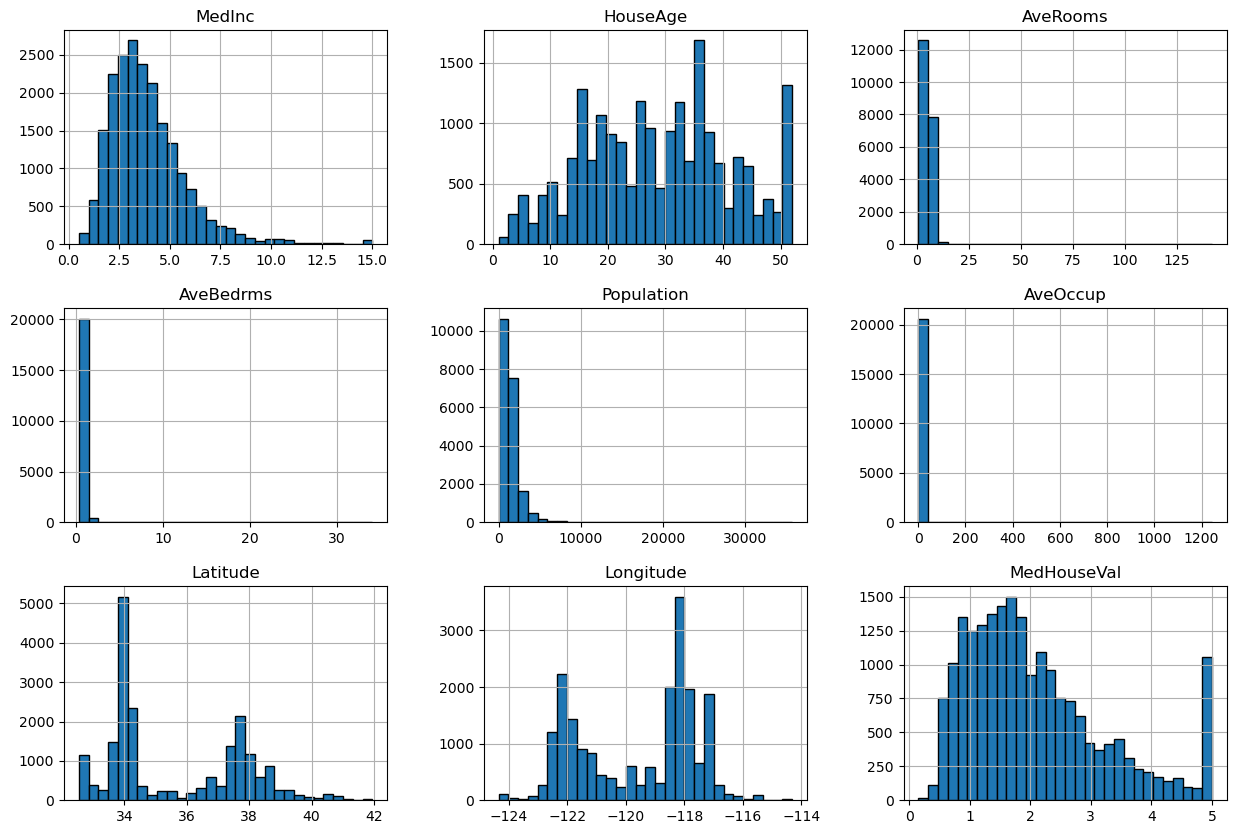

In [145]:
df.hist(figsize=(15,10),bins=30,edgecolor="black")
plt.show()

Text(0.5, 1.0, 'Median housing value depending on their spatial location')

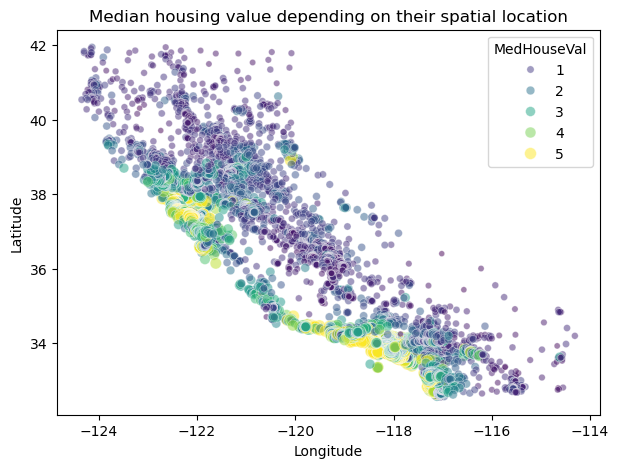

In [146]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x="Longitude",y="Latitude",hue="MedHouseVal",size="MedHouseVal",palette="viridis",alpha=0.5)
plt.legend(title="MedHouseVal",loc="upper right")
plt.title("Median housing value depending on their spatial location")

In [148]:
#finding correlation
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


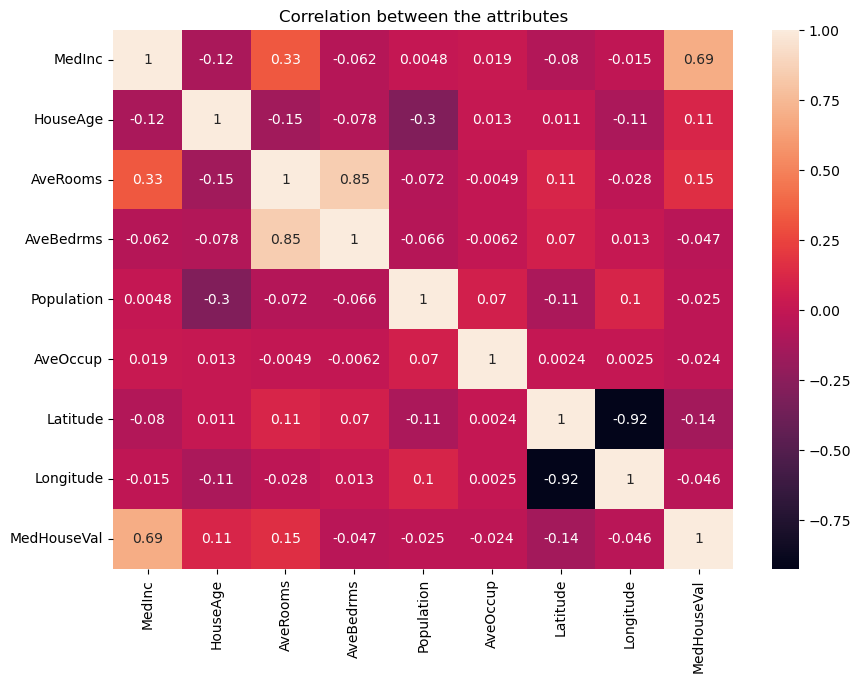

In [149]:
#heapmap to correlate data
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between the attributes")
plt.show()

In [152]:
df.corr()['MedHouseVal'].sort_values()  #printing correlation in ascending order

Latitude      -0.144160
AveBedrms     -0.046701
Longitude     -0.045967
Population    -0.024650
AveOccup      -0.023737
HouseAge       0.105623
AveRooms       0.151948
MedInc         0.688075
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

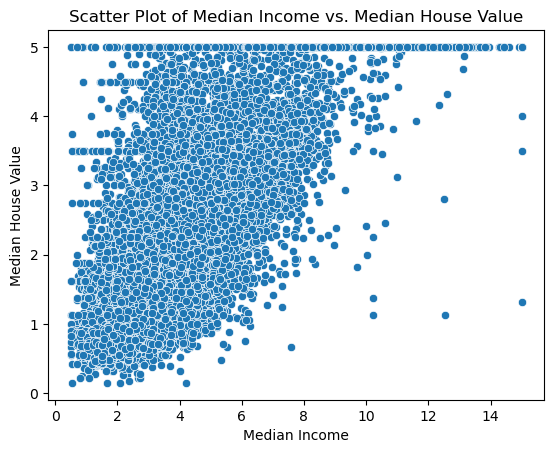

In [155]:
sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'])
plt.title('Scatter Plot of Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

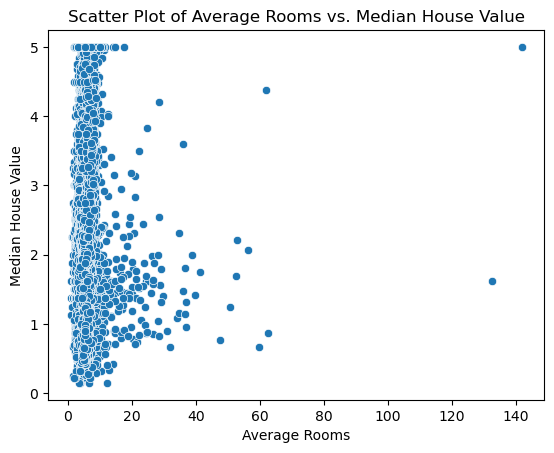

In [157]:
sns.scatterplot(x=df['AveRooms'], y=df['MedHouseVal'])
plt.title('Scatter Plot of Average Rooms vs. Median House Value')
plt.xlabel('Average Rooms')
plt.ylabel('Median House Value')
plt.show()


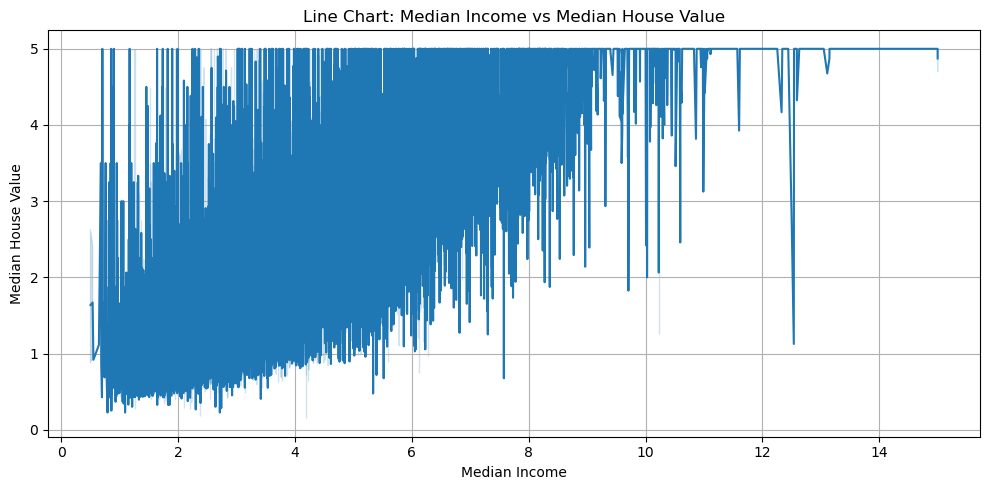

In [159]:
# Sort values for a cleaner line plot
df_sorted = df.sort_values('MedInc')

plt.figure(figsize=(10, 5))
sns.lineplot(x='MedInc', y='MedHouseVal', data=df_sorted)
plt.title('Line Chart: Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)
plt.tight_layout()
plt.show()

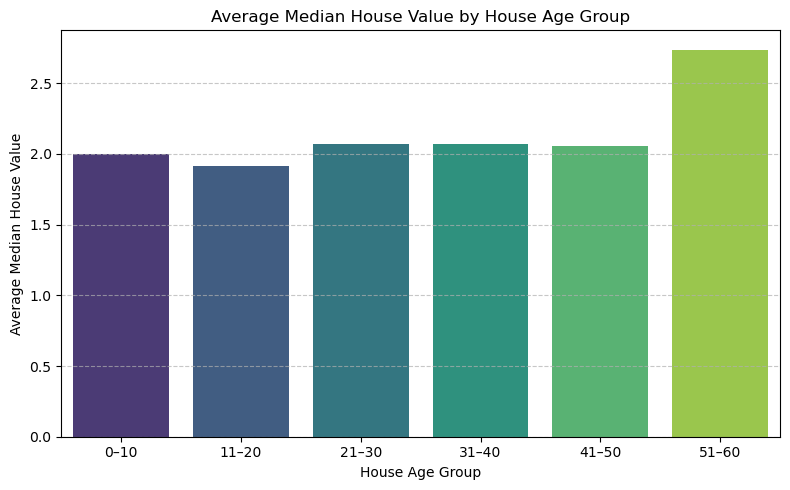

In [177]:

# Bin HouseAge into categories
df['HouseAgeGroup'] = pd.cut(
    df['HouseAge'],
    bins=[0, 10, 20, 30, 40, 50, 60],
    labels=['0–10', '11–20', '21–30', '31–40', '41–50', '51–60']
)

# Group by age group
avg_val_by_age = df.groupby('HouseAgeGroup', observed=True)['MedHouseVal'].mean().reset_index()

# Plot bar chart (suppress future warning)
plt.figure(figsize=(8, 5))
sns.barplot(
    x='HouseAgeGroup',
    y='MedHouseVal',
    data=avg_val_by_age,
    hue='HouseAgeGroup',
    palette='viridis',
    legend=False
)

plt.title('Average Median House Value by House Age Group')
plt.xlabel('House Age Group')
plt.ylabel('Average Median House Value')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [179]:
#splitting data
x=df.drop('MedHouseVal',axis=1)
y=df['MedHouseVal']

In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)  #random_state is used to ensure consistent output

In [183]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (14448, 9)
x_test: (6192, 9)
y_train: (14448,)
y_test: (6192,)


In [185]:
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [193]:
# selecting only numeric columns for scaling
numeric_columns = x_train.select_dtypes(include=['float64', 'int64']).columns

# Scaling numeric data only
scaler = StandardScaler()

# Scales only the numeric columns in x_train and x_test
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])

In [195]:
# Ensures only numeric columns are used for model training
numeric_columns = x_train.select_dtypes(include=['float64', 'int64']).columns

# Selecting only numeric columns from x_train and x_test
x_train_numeric = x_train[numeric_columns]
x_test_numeric = x_test[numeric_columns]

# Scaling the numeric features (if scaling is needed)
scaler = StandardScaler()
x_train_numeric = scaler.fit_transform(x_train_numeric)
x_test_numeric = scaler.transform(x_test_numeric)

# applying linear regression
linreg = LinearRegression()
linreg.fit(x_train_numeric, y_train)
linreg_pred = linreg.predict(x_test_numeric)

# check predictions
print(linreg_pred)

[0.72604907 1.76743383 2.71092161 ... 2.07465531 1.57371395 1.82744133]


In [197]:
#calculating mean absolute errors
linreg_mae=mean_absolute_error(y_test,linreg_pred)
linreg_mse=mean_squared_error(y_test,linreg_pred)
linreg_r2=r2_score(y_test,linreg_pred)
print("MAE of the linear regression model is:",linreg_mae)
print("MSE of the linear regression model is:",linreg_mse)
print("R2 of the linear regression model is:",linreg_r2)

MAE of the linear regression model is: 0.5272474538305953
MSE of the linear regression model is: 0.5305677824766752
R2 of the linear regression model is: 0.5957702326061665


In [201]:
# Ensures only numeric columns are used for model training
numeric_columns = x_train.select_dtypes(include=['float64', 'int64']).columns

# Selects only numeric columns from x_train and x_test
x_train_numeric = x_train[numeric_columns]
x_test_numeric = x_test[numeric_columns]

# Scaling the numeric features (if scaling is needed)
scaler = StandardScaler()
x_train_numeric = scaler.fit_transform(x_train_numeric)
x_test_numeric = scaler.transform(x_test_numeric)

# apply Decision Tree regression
dtree = DecisionTreeRegressor()
dtree.fit(x_train_numeric, y_train)
dtree_pred = dtree.predict(x_test_numeric)

# check predictions
print(dtree_pred)

[0.425   0.73    5.00001 ... 2.13    1.293   2.583  ]


In [203]:
#calculating mean absolute errors
dtree_mae=mean_absolute_error(y_test,dtree_pred)
dtree_mse=mean_squared_error(y_test,dtree_pred)
dtree_r2=r2_score(y_test,dtree_pred)
print("MAE of the linear decision tree model is:",dtree_mae)
print("MSE of the linear decision tree model is:",dtree_mse)
print("R2 of the linear decision tree model is:",dtree_r2)

MAE of the linear decision tree model is: 0.47036024870801035
MSE of the linear decision tree model is: 0.5291640103337532
R2 of the linear decision tree model is: 0.5968397406041049


In [207]:
# Ensures only numeric columns are used for model training
numeric_columns = x_train.select_dtypes(include=['float64', 'int64']).columns

# Selects only numeric columns from x_train and x_test
x_train_numeric = x_train[numeric_columns]
x_test_numeric = x_test[numeric_columns]

# Scaling the numeric features 
scaler = StandardScaler()
x_train_numeric = scaler.fit_transform(x_train_numeric)
x_test_numeric = scaler.transform(x_test_numeric)

# apply Random Forest regression
rforest = RandomForestRegressor()
rforest.fit(x_train_numeric, y_train)
rforest_pred = rforest.predict(x_test_numeric)

# check predictions
print(rforest_pred)

[0.48907   0.75343   4.8429965 ... 2.07322   1.45042   2.19929  ]


In [208]:
#calculating mean absolute errors
rforest_mae=mean_absolute_error(y_test,rforest_pred)
rforest_mse=mean_squared_error(y_test,rforest_pred)
rforest_r2=r2_score(y_test,rforest_pred)
print("MAE of the  random forest regressor model is:",rforest_mae)
print("MSE of the  random forest regressor model is:",rforest_mse)
print("R2 of the  random forest regressor model is:",rforest_r2)

MAE of the  random forest regressor model is: 0.330785468895349
MSE of the  random forest regressor model is: 0.2557801723689855
R2 of the  random forest regressor model is: 0.8051258237014889


In [211]:
data={'MedInc':7.2574, 'HouseAge':52.0, 'AveRooms':8.288136, 'AveBedrms':1.073446, 'Population':496.0, 'AveOccup':2.802260,
       'Latitude':37.85, 'Longitude':-122.24}
index=[0]
new_df=pd.DataFrame(data,index)
new_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,7.2574,52.0,8.288136,1.073446,496.0,2.80226,37.85,-122.24


In [213]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal', 'HouseAgeGroup'],
      dtype='object')

In [219]:

try:
    # Ensures new_df uses the same scaler if scaling was applied
    new_df_scaled = pd.DataFrame(scaler.transform(new_df), columns=new_df.columns)
    
    # Converst DataFrame to NumPy array for prediction
    new_df_scaled_array = new_df_scaled.values
    
    # Predicts using the RandomForest model
    value_pred = rforest.predict(new_df_scaled_array)
    
    # Prints the predicted median housing value
    print("The median housing value for the new data is:", value_pred)

except ValueError as ve:
    print("ValueError during prediction:", ve)
except KeyError as ke:
    print("KeyError: Missing or incorrect column names in input data:", ke)
except Exception as e:
    print("Unexpected error occurred:", e)


The median housing value for the new data is: [3.8530846]
